In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%matplotlib inline

In [2]:
pd.options.display.max_rows = 15

In [3]:
pd.read_csv('D:\\FMI2\\ML\\titanic-survivors\\train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [4]:
original = pd.read_csv('D:\\FMI2\\ML\\titanic-survivors\\train.csv', index_col='PassengerId')
original

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


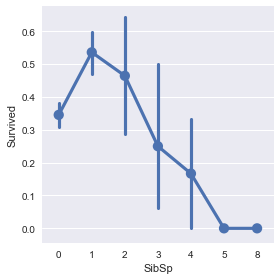

In [5]:
sns.factorplot('SibSp', 'Survived', data=original)

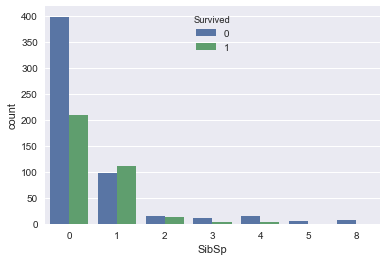

In [6]:
sns.countplot('SibSp', hue='Survived', data=original)

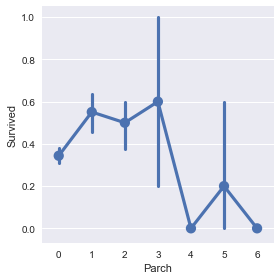

In [7]:
sns.factorplot('Parch', 'Survived', data=original)

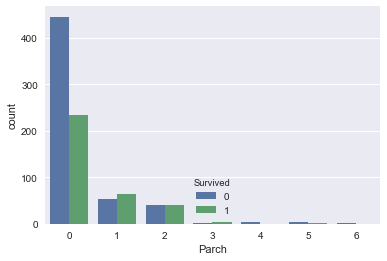

In [8]:
sns.countplot('Parch', hue='Survived', data=original)

In [9]:
data = original.copy()
data['Age'] = data.Age.fillna(data.Age.mean())
data['Sex'] = (data.Sex == 'male').astype(int)

data['BinSibSp']     = (data.SibSp > 2).astype(int)
data['BinParch']       = (data.Parch > 3).astype(int)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinSibSp,BinParch
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

def test_model(X, y = data['Survived'], feat=False, c=1.0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
    model = LogisticRegression(C=c).fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score: ", model.score(X_test, y_test))
    if feat: logistic_regression_features(X, model)
    
# Baseline модел
test_model(data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare']])

# Сега за новия модел
test_model(data[['Pclass', 'Age', 'Sex', 'BinSibSp', 'BinParch', 'Fare']])

train score: 0.797904191617
test score:  0.793721973094
train score: 0.808383233533
test score:  0.807174887892


In [11]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
pd.options.display.max_rows = 20
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Capt          1
Jonkheer      1
Ms            1
Lady          1
Countess      1
Sir           1
Don           1
Name: Title, dtype: int64

In [12]:
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'
data.loc[data.Title == 'Lady', 'Title']  = 'Mrs'
data.loc[data.Title == 'Countess', 'Title']   = 'Miss'
data.Title.value_counts()

Mr          517
Miss        186
Mrs         127
Master       40
Dr            7
Rev           6
Major         2
Col           2
Capt          1
Jonkheer      1
Sir           1
Don           1
Name: Title, dtype: int64

In [13]:
rares = data[(data.Title != 'Mr') & (data.Title != 'Mrs') & (data.Title != 'Miss') & (data.Title != 'Master')]
pd.options.display.max_rows = 25
rares.sort_values(by='Title')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinSibSp,BinParch,Title
PassengerId,,,,,,,,,,,,,,
746,0,1,"Crosby, Capt. Edward Gifford",1,70.000000,1,1,WE/P 5735,71.0000,B22,S,0,0,Capt
695,0,1,"Weir, Col. John",1,60.000000,0,0,113800,26.5500,NaN,S,0,0,Col
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",1,56.000000,0,0,13213,35.5000,A26,C,0,0,Col
31,0,1,"Uruchurtu, Don. Manuel E",1,40.000000,0,0,PC 17601,27.7208,NaN,C,0,0,Don
797,1,1,"Leader, Dr. Alice (Farnham)",0,49.000000,0,0,17465,25.9292,D17,S,0,0,Dr
246,0,1,"Minahan, Dr. William Edward",1,44.000000,2,0,19928,90.0000,C78,Q,0,0,Dr
767,0,1,"Brewe, Dr. Arthur Jackson",1,29.699118,0,0,112379,39.6000,NaN,C,0,0,Dr
318,0,2,"Moraweck, Dr. Ernest",1,54.000000,0,0,29011,14.0000,NaN,S,0,0,Dr
399,0,2,"Pain, Dr. Alfred",1,23.000000,0,0,244278,10.5000,NaN,S,0,0,Dr


In [14]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Don', 'Jonkheer', 'Capt', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')
data.Title.value_counts()

Mr        517
Miss      186
Mrs       127
Master     40
Rare       21
Name: Title, dtype: int64

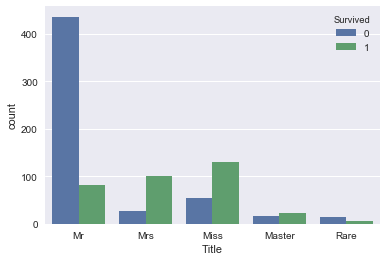

In [15]:
sns.countplot('Title', hue='Survived', data=data);

In [16]:
pd.options.display.max_rows = 12
data[data.Title == 'Master'].sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinSibSp,BinParch,Title
PassengerId,,,,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",1,0.420000,0,1,2625,8.5167,NaN,C,0,0,Master
756,1,2,"Hamalainen, Master. Viljo",1,0.670000,1,1,250649,14.5000,NaN,S,0,0,Master
832,1,2,"Richards, Master. George Sibley",1,0.830000,1,1,29106,18.7500,NaN,S,0,0,Master
79,1,2,"Caldwell, Master. Alden Gates",1,0.830000,0,2,248738,29.0000,NaN,S,0,0,Master
306,1,1,"Allison, Master. Hudson Trevor",1,0.920000,1,2,113781,151.5500,C22 C26,S,0,0,Master
828,1,2,"Mallet, Master. Andre",1,1.000000,0,2,S.C./PARIS 2079,37.0042,NaN,C,0,0,Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,3,"Goodwin, Master. William Frederick",1,11.000000,5,2,CA 2144,46.9000,NaN,S,1,0,Master
126,1,3,"Nicola-Yarred, Master. Elias",1,12.000000,1,0,2651,11.2417,NaN,C,0,0,Master


In [17]:
data[data.Title == 'Mr'].sort_values(by='Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,BinSibSp,BinParch,Title
PassengerId,,,,,,,,,,,,,,
732,0,3,"Hassan, Mr. Houssein G N",1,11.0,0,0,2699,18.7875,NaN,C,0,0,Mr
687,0,3,"Panula, Mr. Jaako Arnold",1,14.0,4,1,3101295,39.6875,NaN,S,1,0,Mr
684,0,3,"Goodwin, Mr. Charles Edward",1,14.0,5,2,CA 2144,46.9000,NaN,S,1,0,Mr
353,0,3,"Elias, Mr. Tannous",1,15.0,1,1,2695,7.2292,NaN,C,0,0,Mr
747,0,3,"Abbott, Mr. Rossmore Edward",1,16.0,1,1,C.A. 2673,20.2500,NaN,S,0,0,Mr
221,1,3,"Sunderland, Mr. Victor Francis",1,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,0,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0,2,"Mitchell, Mr. Henry Michael",1,70.0,0,0,C.A. 24580,10.5000,NaN,S,0,0,Mr
117,0,3,"Connors, Mr. Patrick",1,70.5,0,0,370369,7.7500,NaN,Q,0,0,Mr


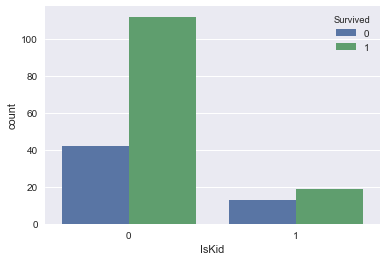

In [18]:
data['IsKid'] = (data.Age < 13).astype(int)
sns.countplot('IsKid', hue='Survived', data=data[data.Title == 'Miss'])

In [19]:
data['IsKid'] = ((data.Age < 13) | (data.Title == 'Master')).astype(int)

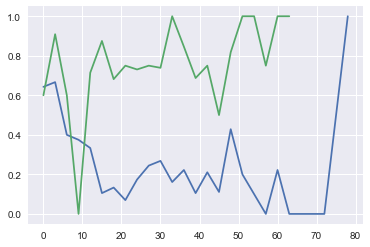

In [20]:
ages = original[['Survived', 'Age', 'Sex']]
ages = ages[~ages.Age.isnull()]
ages.Age = ages.Age.apply(lambda x: (x // 3) * 3)
male_ages = ages[ages.Sex == 'male'][['Survived', 'Age']]
female_ages = ages[ages.Sex == 'female'][['Survived', 'Age']]
plt.plot(male_ages.groupby('Age').mean());
plt.plot(female_ages.groupby('Age').mean());

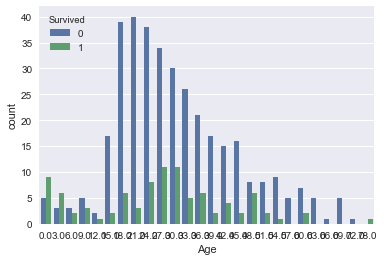

In [21]:
sns.countplot('Age', hue='Survived', data=male_ages)

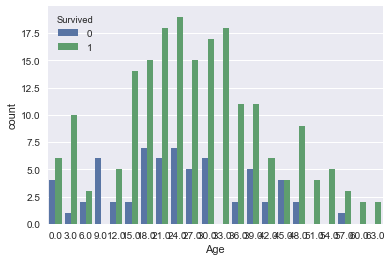

In [22]:
sns.countplot('Age', hue='Survived', data=female_ages)

In [23]:
data['OldMan'] = ((data.Age > 50) & (data.Sex == 1)).astype(int)
data['OldWoman'] = ((data.Age > 50) & (data.Sex == 0)).astype(int)
data['Man'] = ((data.Sex == 1) & (data.IsKid == 0) & (data.OldMan == 0)).astype(int)
data['Woman'] = ((data.Sex == 0) & (data.IsKid == 0) & (data.OldWoman == 0)).astype(int)
data['IsMr'] = (data.Title == 'Mr').astype(int)
data['IsRare'] = (data.Title == 'Rare').astype(int)
data['IsMrs'] = (data.Title == 'Mrs').astype(int)
data['IsMiss'] = (data.Title == 'Miss').astype(int)

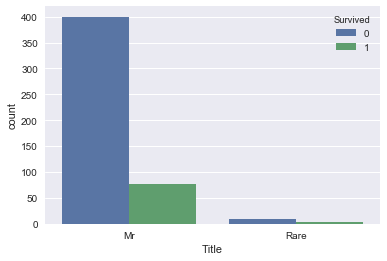

In [24]:
sns.countplot('Title', hue='Survived', data=data[data.Man == 1])

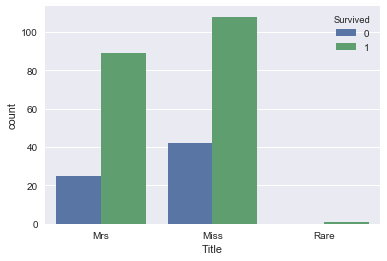

In [25]:
sns.countplot('Title', hue='Survived', data=data[data.Woman == 1])

train score: 0.830838323353
test score:  0.811659192825


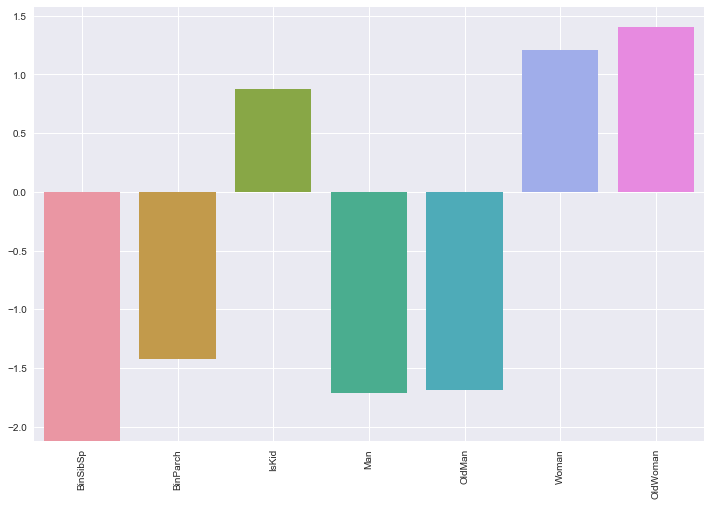

In [26]:
test_model(data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman']], feat=True)

In [27]:
data['EmbarkedC'] = (data.Embarked == 'C').astype(int)
data['EmbarkedQ'] = (data.Embarked == 'Q').astype(int)
data['EmbarkedS'] = (data.Embarked == 'S').astype(int)
data['Class1'] = (data.Pclass == 1).astype(int)
data['Class2'] = (data.Pclass == 2).astype(int)
data['Class3'] = (data.Pclass == 3).astype(int)

In [28]:
test_model(data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS']], c=100000.0)
test_model(data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'Class1', 'Class2', 'Class3']], c=100000.0)
test_model(data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Class1', 'Class2', 'Class3']], c=100000.0)

train score: 0.830838323353
test score:  0.811659192825
train score: 0.833832335329
test score:  0.811659192825
train score: 0.833832335329
test score:  0.811659192825


In [29]:
from sklearn.ensemble import RandomForestClassifier
def test_model_forest(X, y = data['Survived']):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
    model = RandomForestClassifier(random_state=0, n_estimators=70, max_depth=5).fit(X_train, y_train)
    print("train score:", model.score(X_train, y_train))
    print("test score: ", model.score(X_test, y_test))

test_model_forest(data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS']])
test_model_forest(data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'Class1', 'Class2', 'Class3']])
test_model_forest(data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Class1', 'Class2', 'Class3']])

train score: 0.830838323353
test score:  0.80269058296
train score: 0.835329341317
test score:  0.807174887892
train score: 0.842814371257
test score:  0.825112107623


In [30]:
from sklearn.model_selection import GridSearchCV
X = data[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Class1', 'Class2', 'Class3', 'Fare']].copy()
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
    
search = GridSearchCV(model, {'n_estimators': [10, 50],
                              'max_depth': [2, 5, 10]})
search.fit(X, y)
pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

,rank_test_score,mean_test_score,params
3,1,0.823793,"{'max_depth': 5, 'n_estimators': 50}"
5,2,0.815937,"{'max_depth': 10, 'n_estimators': 50}"
2,3,0.812570,"{'max_depth': 5, 'n_estimators': 10}"
4,4,0.809203,"{'max_depth': 10, 'n_estimators': 10}"
0,5,0.772166,"{'max_depth': 2, 'n_estimators': 10}"
1,6,0.769921,"{'max_depth': 2, 'n_estimators': 50}"


In [31]:
model = RandomForestClassifier(random_state=1, max_depth=6, n_estimators=30)
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.883233532934
test score:  0.847533632287


In [32]:
model.fit(X, y)

test = pd.read_csv('D:\\FMI2\\ML\\titanic-survivors\\test.csv', index_col=['PassengerId'])
test.describe()


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
test['Age'] = test.Age.fillna(data.Age.mean())
test['Fare'] = test.Fare.fillna(test.Fare.mean())
test['Sex'] = (test.Sex == 'male').astype(int)

test['BinSibSp']    = (test.SibSp > 2).astype(int)
test['BinParch']    = (test.Parch > 3).astype(int)


test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)
test.loc[test.Title == 'Mlle', 'Title'] = 'Miss'
test.loc[test.Title == 'Mme', 'Title']  = 'Mrs'
test.loc[test.Title == 'Ms', 'Title']   = 'Miss'
test.loc[test.Title == 'Lady', 'Title']  = 'Mrs'
test.loc[test.Title == 'Countess', 'Title']   = 'Miss'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Don', 'Jonkheer', 'Capt', 'Sir']
test.Title = test.Title.replace(rare_titles, 'Rare')

test['IsKid'] = ((test.Age < 13) | (test.Title == 'Master')).astype(int)
test['OldMan'] = ((test.Age > 50) & (test.Sex == 1)).astype(int)
test['OldWoman'] = ((test.Age > 50) & (test.Sex == 0)).astype(int)
test['Man'] = ((test.Sex == 1) & (test.IsKid == 0) & (test.OldMan == 0)).astype(int)
test['Woman'] = ((test.Sex == 0) & (test.IsKid == 0) & (test.OldWoman == 0)).astype(int)

test['EmbarkedC'] = (test.Embarked == 'C').astype(int)
test['EmbarkedQ'] = (test.Embarked == 'Q').astype(int)
test['EmbarkedS'] = (test.Embarked == 'S').astype(int)
test['Class1'] = (test.Pclass == 1).astype(int)
test['Class2'] = (test.Pclass == 2).astype(int)
test['Class3'] = (test.Pclass == 3).astype(int)

X = test[['BinSibSp', 'BinParch', 'IsKid', 'Man', 'OldMan', 'Woman', 'OldWoman', 'EmbarkedC', 'EmbarkedQ', 'EmbarkedS', 'Class1', 'Class2', 'Class3', 'Fare']]
predictions = model.predict(X)
frame = pd.DataFrame({
    'PassengerId': pd.read_csv('D:\\FMI2\\ML\\titanic-survivors\\test.csv').PassengerId,
    'Survived': predictions
})
frame = frame.set_index('PassengerId')
frame.to_csv('D:\\FMI2\\ML\\titanic-survivors\\predictions.csv')
frame

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
...,...
1304,0
1305,0
